# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
df_new=pd.read_excel('time.xlsx')

for loop to take only the average of the avlues between the  zero values(nigths) and append to a list

In [4]:
total=0
g_avg=[]
output=[]
counter=0
for x in df_new[df_new['T']>3]['G']:
    if (x<5):
        counter+=1
        total+=x
    if(x>5 and counter!=0):
        z=total/counter
        g_avg.append(z)
        counter=0
        total=0
print(g_avg)

[0.2041203935416664, 1.771161172413793, 0.15353679161137435, 0.0837225919168591, 0.08764785844444443, 0.1106998300668151, 0.47846708558225476, 0.09328081642857136, 4.601723333333333, 0.15079387060606061, 0.10453882618025744, 0.09268452004264388, 0.11905729285714281, 0.12679425690021226, 0.11172975247311821, 0.10697373060344821, 0.1234291446153846, 0.17055267301927182, 0.11553534248366007, 0.13553731263858082, 0.7007720544117642, 2.3215003749999976, 0.32199271142131974, 0.08112642551096487, 0.11718615369127514, 0.25350016391437297, 0.11928619426048563, 0.08837483462414573, 0.13669896689189182, 0.09273544739229024, 0.09701177088888888, 0.12467239170403585, 0.21561051592356678, 0.11576828436781608, 0.12020281624713959, 0.07573564677419355, 0.1014294797701149, 0.09184936849315063, 0.10939350981735156, 0.2556458756906077, 0.19285572815018306, 0.1195741315384615, 0.11424404664107485, 0.1185211037667303, 0.18268144078799248, 0.10504823148362234, 0.1529752592385786, 0.10704190751445083, 0.0848

In [5]:
total=0
p_avg=[]
output=[]
counter=0
for x in df_new[df_new['T']>3]['P']:
    if (x<5):
        counter+=1
        total+=x
    if(x>5 and counter!=0):
        z=total/counter
        p_avg.append(z)
        counter=0
        total=0
print(p_avg)

[0.1779769618705036, 2.9944100000000002, 4.53448, 2.4253699999999996, 0.16839059515738494, 0.06476288524590165, 0.05777829705882355, 0.10457059954648527, 4.16951, 4.80035, 4.376539999999999, 4.62317, 0.29725350148936175, 0.10834325228438228, 0.12114632429906541, 0.11054387995652175, 0.11045056249999996, 0.07193561640798228, 0.08534384565217391, 0.0840056230263158, 0.07741994747252748, 0.140748668847352, 0.17813465895196506, 0.10262350707964603, 0.06623612045454547, 0.625046375409836, 2.122239, 0.4184831886528498, 0.05245427971333334, 0.09267933249427918, 3.545664, 0.26948786614420056, 0.0875282466367713, 0.07843453340229885, 0.13047697283105023, 0.08861274370709382, 0.09428837466367714, 0.13345627805429866, 0.23236890032362467, 0.1039388090487239, 0.07914509118329467, 0.08706828475750578, 0.09323905393518518, 0.06941333640552995, 0.1046036505747126, 0.26782337715877436, 4.252206428571428, 0.08871610571698116, 0.11906967861271676, 0.10482162524084777, 0.12058152781609194, 0.181612991877

View correlation between the irradiance and power

ValueError: x and y must be the same size

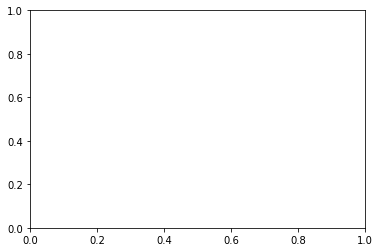

In [17]:
plt.scatter(g_avg,p_avg)
plt.xlabel('irradiance')
plt.ylabel('power')

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

In [8]:
df_new['g_avg'] = pd.Series(g_avg)
df_new['p_avg'] = pd.Series(p_avg)

Drop the original G and P

In [15]:
df_new=df.drop(columns=['G','P','TIME','T'])

In [16]:
df_new

,g_avg,p_avg
0,0.204120,0.177977
1,1.771161,2.994410
2,0.153537,4.534480
3,0.083723,2.425370
4,0.087648,0.168391
...,...,...
97195,NaN,NaN
97196,NaN,NaN
97197,NaN,NaN
97198,NaN,NaN


Deleteing teh Nan rows

In [18]:
df_new.dropna()

,g_avg,p_avg
0,0.204120,0.177977
1,1.771161,2.994410
2,0.153537,4.534480
3,0.083723,2.425370
4,0.087648,0.168391
...,...,...
71,0.076401,0.147712
72,0.091561,0.126949
73,0.079992,0.178369
74,0.100372,0.153506


In [19]:
df_new = df_new.reset_index()

In [20]:
df_new=df_new.dropna()
df_new

,index,g_avg,p_avg
0,0,0.204120,0.177977
1,1,1.771161,2.994410
2,2,0.153537,4.534480
3,3,0.083723,2.425370
4,4,0.087648,0.168391
...,...,...,...
71,71,0.076401,0.147712
72,72,0.091561,0.126949
73,73,0.079992,0.178369
74,74,0.100372,0.153506


Carrying out the K-means model testing

In [21]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pred=km.fit_predict(df_new)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 6, 6, 6, 6])

In [23]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.204120,0.177977,0
1,1,1.771161,2.994410,0
2,2,0.153537,4.534480,0
3,3,0.083723,2.425370,0
4,4,0.087648,0.168391,0


Text(0, 0.5, 'P')

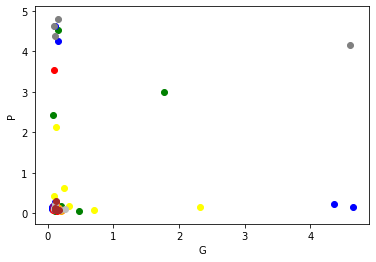

In [24]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')


plt.xlabel('G')
plt.ylabel('P')

data nomalisation

In [25]:
scaler= MinMaxScaler()
scaler.fit(df_new[['g_avg']])
df_new[['g_avg']]=scaler.transform(df_new[['g_avg']])
scaler.fit(df_new[['p_avg']])
df_new[['p_avg']]=scaler.transform(df_new[['p_avg']])
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.031006,0.026438,0
1,1,0.372474,0.619634,0
2,2,0.019984,0.944003,0
3,3,0.004771,0.499783,0
4,4,0.005626,0.024418,0


In [26]:
y_pred=km.fit_predict(df_new)
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 9, 9,
       9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 8, 8, 8, 8, 8, 8])

In [27]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.031006,0.026438,5
1,1,0.372474,0.619634,5
2,2,0.019984,0.944003,5
3,3,0.004771,0.499783,5
4,4,0.005626,0.024418,5


Text(0, 0.5, 'P')

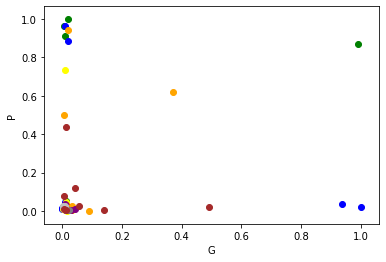

In [28]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')


plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [29]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['g_avg','p_avg']])
    sse.append(km.inertia_)
sse

[9.162755850218838,
 3.3233574334691625,
 1.253676927516592,
 0.7133072221383387,
 0.3551501516023259,
 0.20368602057140262,
 0.10008162537466786,
 0.06272409171643276,
 0.0423807145465034,
 0.02887275020841827]

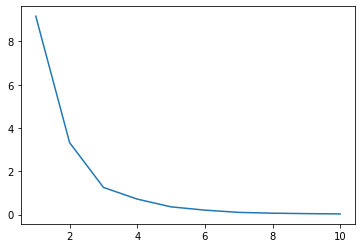

In [30]:
plt.plot(k_range,sse)

In [31]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df_new[['g_avg','p_avg']])

In [32]:
df_new['cluster']=y_pred

Text(0, 0.5, 'P')

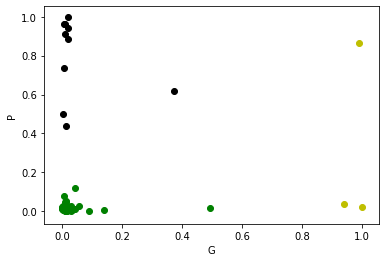

In [37]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]


plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='black')
plt.scatter(df2.g_avg,df2.p_avg, color='y')



plt.xlabel('G')
plt.ylabel('P')

In [34]:
df_new['g_avg'].describe()

count    76.000000
mean      0.065154
std       0.198804
min       0.000000
25%       0.007463
50%       0.011565
75%       0.019892
max       1.000000
Name: g_avg, dtype: float64